# Effect of Subjective Norms on Math Interest and Math Self-Efficacy
## by (Ahmad Zain)

## Investigation Overview

The goal of this Investigation was to inspect whether there was a relationship pertaining to interest in math as well as the environmental influences surrounding such interest.

#### summary of findings:  
By classifying students' responses to various survey questions, I found that a student's level of interest in math was closely related to how a student's environment perceives the subject of math. When Introducing a third variable concerning a student's confidence in solving a certain math problem, the level of confidence for a student didn't have much effect on their interest in the subject as much as their environment. Even when they weren't very confident, they still showed an interest in the subject. The same with the level of math anxiety students reported, in environments that had strong to moderate interest in math, students were classified to have strong to moderate interest in math despite when they reported strong levels of anxiety.

## Dataset Overview

The dataset contains features that measure the knowledge, confidence, and interest of students on different subjects such as math and science and provides background information on the students from 65 different economies.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_act = pd.read_csv("selected_features.csv")

In [46]:
first_category = ["ST29Q01", "ST29Q03", "ST29Q04", "ST29Q06"]
second_category = ["ST35Q01", "ST35Q02", "ST35Q03", "ST35Q04", "ST35Q05", "ST35Q06"]
third_category = ["ST37Q02", "ST37Q03", "ST37Q04", "ST37Q05", "ST37Q06", "ST37Q07", "ST37Q08"]
fourth_category = ["ST42Q02", "ST42Q04", "ST42Q06", "ST42Q07", "ST42Q09"]
fifth_category = ["ST42Q01", "ST42Q03", "ST42Q05", "ST42Q08", "ST42Q10"]

cat_levels = [
    
    ["Strongly agree", "Agree", "Disagree", "Strongly disagree"], 
    ["Very confident", "Confident", "Not very confident", "Not at all confident"]
]

# Function for changing the data type of specified columns
def convert_ordinal(cols, cats):
    for col in cols:
        order = pd.api.types.CategoricalDtype(ordered=True, categories=cats)
        df_act[col] = df_act[col].astype(order)
    

convert_ordinal(first_category, cat_levels[0])
convert_ordinal(second_category, cat_levels[0])
convert_ordinal(third_category, cat_levels[1])
convert_ordinal(fourth_category, cat_levels[0])
convert_ordinal(fifth_category, cat_levels[0])

## Interest in Math Based on Four Survey Questions
participants seem to be teetering between agreement and disagreement regarding their interest in math across all activities(Enjoy Reading, Look Forward to Lessons, Enjoy Maths, Interested).  
<br>
Furthermore, this frequent and close ratio between agreement and disagreement implies associations with other factors rather than mere coincidence. This implied association will be investigated more in the subsequent exploration of bivariate and multivariate approaches.

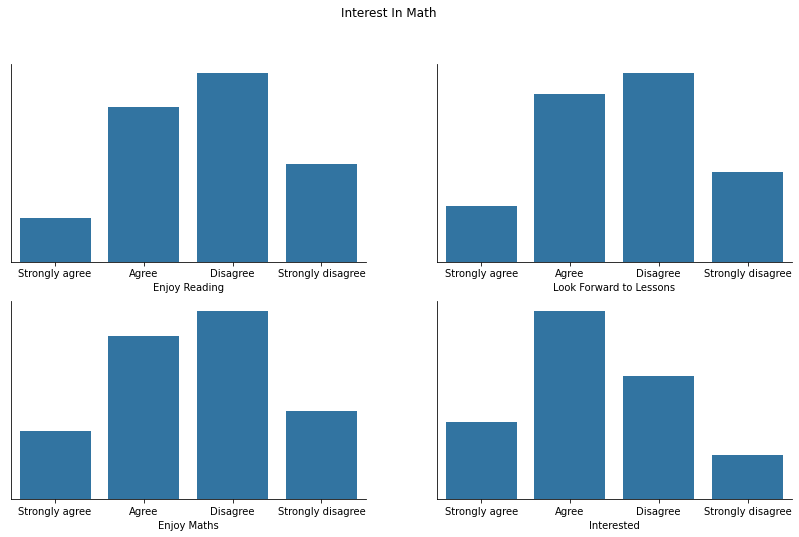

In [54]:
xlabels = {0: "Enjoy Reading", 1: "Look Forward to Lessons", 2: "Enjoy Maths", 3: "Interested"}

base_color = sb.color_palette()[0]
fig, ax = plt.subplots(nrows=2, ncols=2,figsize = [14, 8])
ax = ax.flatten()

for i, col in enumerate(first_category):
    sb.countplot(data=df_act, x=col, color=base_color, ax=ax[i])
    ax[i].set_xlabel(xlabels[i])
    ax[i].get_yaxis().set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
plt.suptitle("Interest In Math", fontsize=12)
plt.show()

## How Interest in Math is Affacted by a Student's Environment

The plot shows the depiction of the distribution of the various responses reported by students regarding their interest in math and how they relate to the other various responses they have reported regarding their environment's perception and level of interest in the subject of math.

#### #1 cluster(left):
There is an interesting consistent trend on how having a strong agreement (corresponds with strong interest across all math activities) is linearly affected by a student's environment such as their parents and friends in terms of how they perceive math and their level of comprehension or interest in the subject.

The second cluster from the left represents students with less interest in math than the previous one across different environmental influences. However, there is a similar trend between a student's interest in math and these environmental influences, such as:  
    <br>
    - Friends Do Well in Mathematics  
    - Friends Work Hard on Mathematics  
    - Friends Enjoy Mathematics Tests  
    - Parents Believe Studying Mathematics Is Important  
    - Parents Believe Mathematics Is Important for Career  
    - Parents Like Mathematics
    
    Given how most students who agreed to have an interest in the different math activities also agreed to having believed that their friends and parents have an interest in math



#### #3 cluster:
Here we can see that students who *disagree* on having a general interest in math come from a diverse influencing environments, mostly between *agreement* and *disagreement*. but the trend still indicates a similar pattern as before, especially if we want to consider that *agreement* alone is not a strong environmental factor concerning the subject of math.

#### #4 cluster:
Although there are fewer students who *strongly disagree* to have an interest in math, students seem to be affected by their environment. And it's clear how the last bar in each cluster (corresponds with an eviroment with a lack of sufficient interest in math) rises consistently as you move down the scale for interest in math.  
  
<br>  
  
  
Finally, these derived conclusions are based solely on correlations and not to be indicative of causality in that a student's environment is the *cause* for interest or lack of interest regarding math.

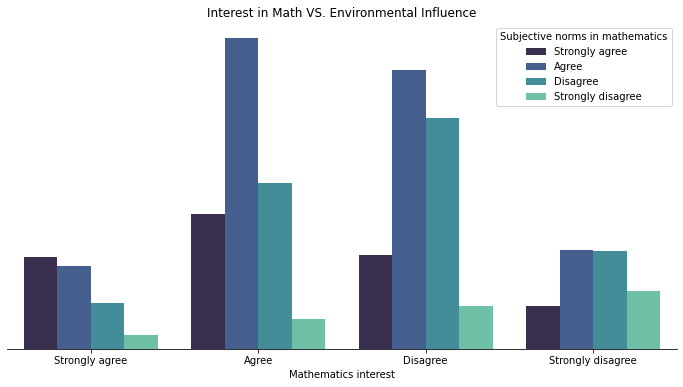

In [51]:
# a data subset for first and second categories 
math_in = df_act.loc[:, first_category + second_category]

# First, restructuring the second category and keeping the the observations of the first category intact 
math_in_melt = math_in.melt(id_vars=first_category, value_vars=second_category,
                            var_name="SUBNORM",
                            value_name="SUBNORM_RES")

# Second, restructuring the first category and keeping the observations of the second category intact
math_in_melt = math_in_melt.melt(id_vars=["SUBNORM", "SUBNORM_RES"], value_vars=first_category,
                                 var_name="INTMAT",
                                 value_name="INTMAT_RES")

plt.figure(figsize=[12, 6])

# Subsetting the various "math interest responses (x)" with "subjective norms responses (hue)"
sb.countplot(data=math_in_melt, x="INTMAT_RES", hue="SUBNORM_RES", hue_order=cat_levels[0], order=cat_levels[0],
             palette="mako")

plt.title("Interest in Math VS. Environmental Influence")
plt.xlabel("Mathematics interest")
plt.legend(title="Subjective norms in mathematics", loc = 1)

# Getting the current axes to customize the plot
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

## How Mathematics Self-Efficacy is Affacted By a Student's Environment
The plot shows the depiction of the distribution of the various responses reported by students regarding their level of confidence for solving certain math problems and how they relate to the other various responses they have reported regarding their environment's perception and level of interest in the subject of math.

#### #1 cluster(left):
Students who have been classified as *very confident* in their overall ability to solve various math problems seem to come from various environments characterized by the level of interest in math. Since the two subjective norm rates of *strongly agree* & *agree* can add up to the most influential factor, we can assume for now that highly confident students are affected by their environment that dominintely consists of individuals with interest in math.

#### #2 cluster:
Students classified as *confident* but not *very confident* in their overall ability to solve various math problems seem to fit the previous pattern of the correlation between environment and math interest or confidence and are in an environment dominated by *Agree* (but not *Strongly Agree*) and *Disagree* in regards to the overall perception of math.

#### remaining clusters:
The last two clusters are similar in spirit to the second previous cluster.


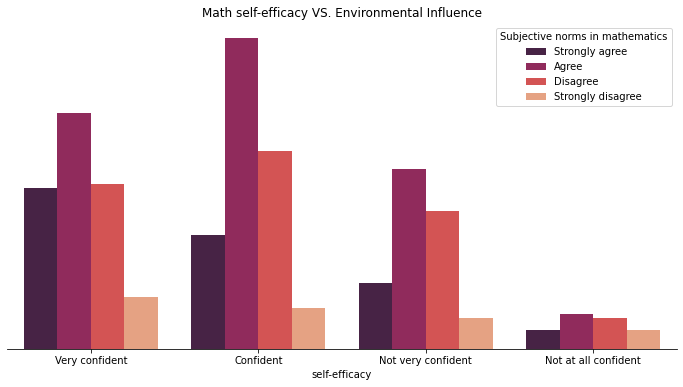

In [52]:
# Here I follow the same strategy as above but with a different feature category
math_eff = df_act.loc[:, second_category + third_category]

math_eff_melt = math_eff.melt(id_vars=second_category, value_vars=third_category,
                              var_name="MATHEFF",
                              value_name="MATHEFF_RES")

math_eff_melt = math_eff_melt.melt(id_vars=["MATHEFF", "MATHEFF_RES"], value_vars=second_category,
                                   var_name="SUBNORM",
                                   value_name="SUBNORM_RES")

plt.figure(figsize=[12, 6])

sb.countplot(data=math_eff_melt, x="MATHEFF_RES", hue="SUBNORM_RES", hue_order=cat_levels[0], order=cat_levels[1],
             palette="rocket")

plt.title("Math self-efficacy VS. Environmental Influence")
plt.xlabel("self-efficacy")
plt.legend(title="Subjective norms in mathematics", loc = 1)


# Getting the current axes to customize the plot
ax = plt.gca()
ax.get_yaxis().set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

## Relationship between Subjective Norms and Math Interest & Math Self-Efficacy

After introducing a third variable (Math Self-Efficacy), the following conclusions were observed:

Students from an environment with strong interest in math, maintained a strong interest in math themselves even if they didn't necessarily have *confidence* in their math problem solving skill, which suggests that there is a correlation between Subjective Norms in math and Interest in Math, but doesn't necessarily come from personal aspiration given the low confidence levels.

Most students with moderate interest in math are in environments with moderate interest in math as well, despite being affected by the different levels of confidence in math problem-solving. In other words, this indicates that student interest in math is influenced by their environment perception of math although they don't necessarily have to have the confidence in their ability to solve a particular math problem.

Changing the third variable from self-efficacy to math anxiety still tells the same story, in which students' interest in math is affected by their environment, but this time, even if they measured strong level of anxiety.